In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import trange


# Exercício 1

In [2]:
def xor(bool1: bool, bool2: bool) -> bool:
    return bool1 != bool2


def regra_90(N: int = 141, t: int = 70) -> np.ndarray:
    matriz = np.zeros((t, N), dtype=bool)
    matriz[0, N // 2] = True

    for tt in range(t - 1):
        for i in range(1, N - 1):
            matriz[tt + 1, i] = xor(matriz[tt, i - 1], matriz[tt, i + 1])

    matriz = matriz.astype(int)
    return matriz


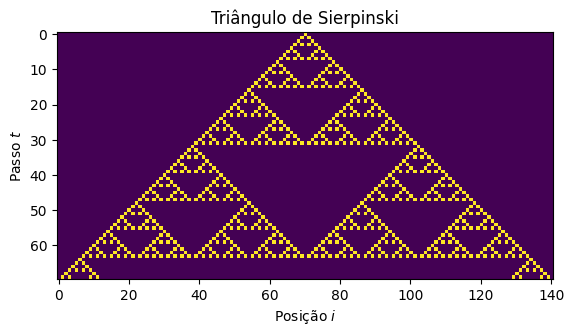

In [3]:
matriz = regra_90()
# print(matriz)

fig1, ax1 = plt.subplots()
# fig1.set_size_inches((20, 20))
ax1.set_title('Triângulo de Sierpinski')
ax1.set_xlabel('Posição $i$')
ax1.set_ylabel('Passo $t$')

ax1.imshow(X=matriz)

# fig1.savefig(
#     fname='lista04/fig_1.pdf',
#     dpi=1000
# )


# Exercício 2

In [4]:
def verificar_retangulo(matriz: np.ndarray = matriz, t_i: int = 0, t_f: int = -1, i_i: int = 0, i_f: int = -1) -> bool:
    return 1 in matriz[t_i:t_f, i_i:i_f]


def caixas(L: int, matriz: np.ndarray = matriz) -> np.ndarray:
    t, N = np.shape(matriz)
    

In [5]:
np.shape(matriz)

(70, 141)